This notebook uses episodic training with CNV data as input data.

This uses AUROC when validating model during training and saving best model. TCGA is seen by model when training. There are 2 domain-specific modules, for cell-line and TCGA.

#### Imports

In [1]:
import pandas as pd
import numpy as np

In [2]:
import sys

sys.path.append("../../vae_zinb_reprn/")
sys.path.append("../src/")

In [3]:
import datetime
import logging
import time
import torch
import random

In [4]:
from EpiFCRModel import ModelEpiFCR

In [5]:
chosen_seed = 42
torch.manual_seed(chosen_seed)
random.seed(chosen_seed)
np.random.seed(chosen_seed)

In [6]:
torch.multiprocessing.set_sharing_strategy('file_system')

### PACLITAXEL

In [7]:
best_parameters = {'audrc_threshold': 0.3201828394967454,
 'ldr': 0.4434139466696423,
 'lr': 0.22839922476988755,
 'weight_decay': 0.10803443440316346,
 'momentum': 0.3621663300280601,
 'step_size': 81,
 'loss_weight_epic': 6.176727204821433,
 'loss_weight_epif': 1.179668661228714,
 'loss_weight_epir': 4.559332966769174,
 'loops_agg_warm': 70,
 'loops_train': 200,
 'loops_warm': 80,
 'warm_up_agg': 1,
 'hd': 2,
 'batch_size': 32,
 'test_every': 1,
 'ite_train_epi_c': 60,
 'ite_train_epi_f': 60,
 'bn_eval': 0,
 'seed': 42}

In [8]:
model_PACLITAXEL = ModelEpiFCR('PACLITAXEL', 'cnv')
#  Unable to calculate AUROC for validation set 1
model_PACLITAXEL.get_results(best_parameters)

DomainSpecificNN(
  (feature1): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.4434139466696423, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (feature2): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.4434139466696423, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier1): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=256, out_features=1, bias=True)
    )
  )
  (classifier2): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=256,

/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,68,{0: 68},NaN,-0.000000
0,PDX,8,{0: 8},NaN,-0.000000
0,TCGA,31,"{1: 23, 0: 8}",0.744565,0.914131


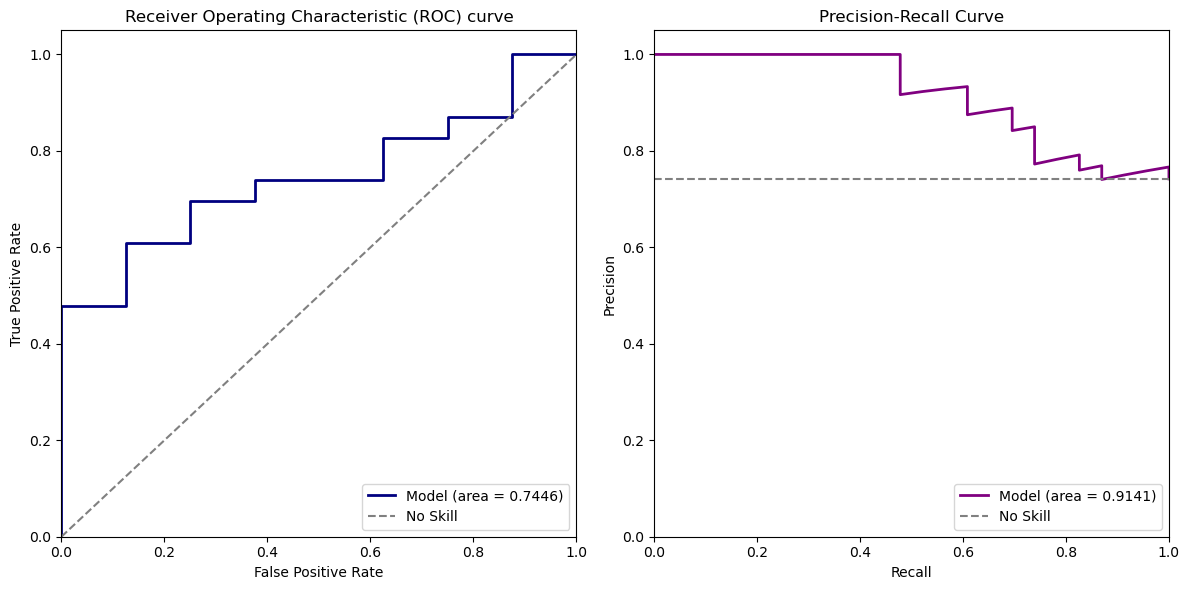

In [9]:
model_PACLITAXEL.get_roc_pr_curves(best_parameters, False, 'tcga')

In [10]:
model_PACLITAXEL.get_train_set_results(best_parameters, False)

Threshold used for cell-line with PACLITAXEL: 0.3201828394967454


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,608,"{0: 600, 1: 8}",0.463333,0.029927
0,PDX,35,"{0: 30, 1: 5}",0.306667,0.133786
0,TCGA,82,"{1: 53, 0: 29}",0.471698,0.602643


Distribution of Predictions by Model
[0.47634712 0.47782391 0.47830358 0.47972934 0.48191348]
TP: 0, FP: 0, TN: 8, FN: 23


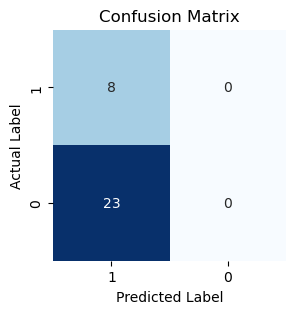

In [11]:
model_PACLITAXEL.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

### CISPLATIN

In [12]:
best_parameters = {'audrc_threshold': 0.2905134599842131,
 'ldr': 0.08883102145045996,
 'lr': 0.13048349511809648,
 'weight_decay': 0.09680433155037463,
 'momentum': 0.6340746430680155,
 'step_size': 32,
 'loss_weight_epic': 4.956705323420465,
 'loss_weight_epif': 0.2631155541166663,
 'loss_weight_epir': 2.9809327125549316,
 'loops_agg_warm': 50,
 'warm_up_agg': 0,
 'ite_train_epi_c': 150,
 'ite_train_epi_f': 70,
 'hd': 1,
 'batch_size': 32,
 'loops_train': 400,
 'loops_warm': 150,
 'test_every': 1,
 'bn_eval': 0,
 'seed': 42}

In [13]:
model_CISPLATIN = ModelEpiFCR('CISPLATIN', 'cnv')
#  Unable to calculate AUROC for validation set 1
model_CISPLATIN.get_results(best_parameters)

DomainSpecificNN(
  (feature1): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=512, bias=True)
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.08883102145045996, inplace=False)
      (4): Linear(in_features=512, out_features=128, bias=True)
      (5): Sigmoid()
    )
  )
  (feature2): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=512, bias=True)
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.08883102145045996, inplace=False)
      (4): Linear(in_features=512, out_features=128, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier1): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=128, out_features=1, bias=True)
    )
  )
  (classifier2): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=12

,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,54,"{0: 53, 1: 1}",0.849057,0.111111
0,TCGA,36,"{1: 27, 0: 9}",0.761317,0.924819


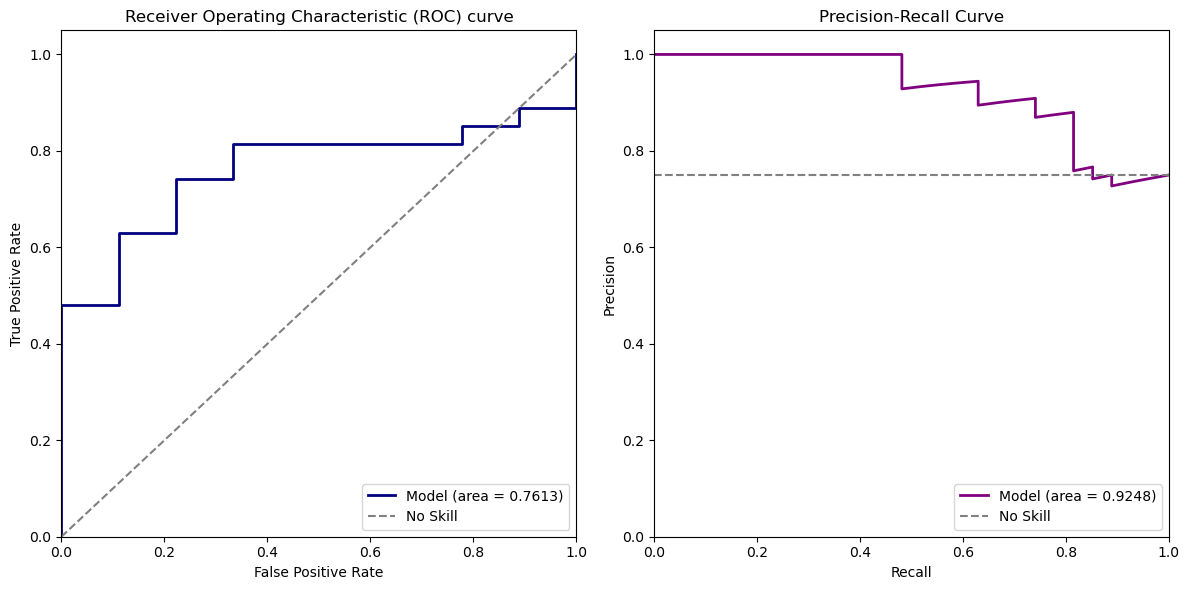

In [14]:
model_CISPLATIN.get_roc_pr_curves(best_parameters, False, 'tcga')

In [15]:
model_CISPLATIN.get_train_set_results(best_parameters, False)

Threshold used for cell-line with CISPLATIN: 0.2905134599842131
Test set Idx 1 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,483,"{0: 479, 1: 4}",0.816284,0.102578
0,PDX,0,{},NaN,NaN
0,TCGA,170,"{1: 130, 0: 40}",0.410865,0.704138


Distribution of Predictions by Model
[0.57868451 0.59896171 0.6198791  0.63865452 0.69083977]
TP: 27, FP: 9, TN: 0, FN: 0


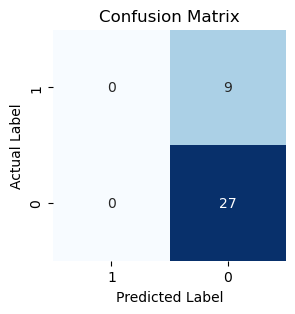

In [16]:
model_CISPLATIN.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## 5-FLUOROURACIL

In [17]:
best_parameters = {'audrc_threshold': 0.27997513353824616,
 'ldr': 0.291043663918972,
 'lr': 0.26822978854179386,
 'weight_decay': 0.05419432163238525,
 'momentum': 0.2952832210063934,
 'step_size': 53,
 'loss_weight_epic': 5.455292284488678,
 'loss_weight_epif': 1.7492030262947083,
 'loss_weight_epir': 5.221074134111404,
 'loops_agg_warm': 90,
 'ite_train_epi_f': 50,
 'hd': 1,
 'batch_size': 32,
 'loops_train': 200,
 'loops_warm': 100,
 'warm_up_agg': 0,
 'test_every': 1,
 'ite_train_epi_c': 100,
 'bn_eval': 0,
 'seed': 42}

In [18]:
model_5_FLUOROURACIL = ModelEpiFCR('5-FLUOROURACIL', 'cnv')
#  Unable to calculate AUROC for validation set 1
model_5_FLUOROURACIL.get_results(best_parameters)

DomainSpecificNN(
  (feature1): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=512, bias=True)
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.291043663918972, inplace=False)
      (4): Linear(in_features=512, out_features=128, bias=True)
      (5): Sigmoid()
    )
  )
  (feature2): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=512, bias=True)
      (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.291043663918972, inplace=False)
      (4): Linear(in_features=512, out_features=128, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier1): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=128, out_features=1, bias=True)
    )
  )
  (classifier2): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=128, o

/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,61,{0: 61},NaN,-0.000000
0,TCGA,21,"{1: 17, 0: 4}",0.875,0.968316


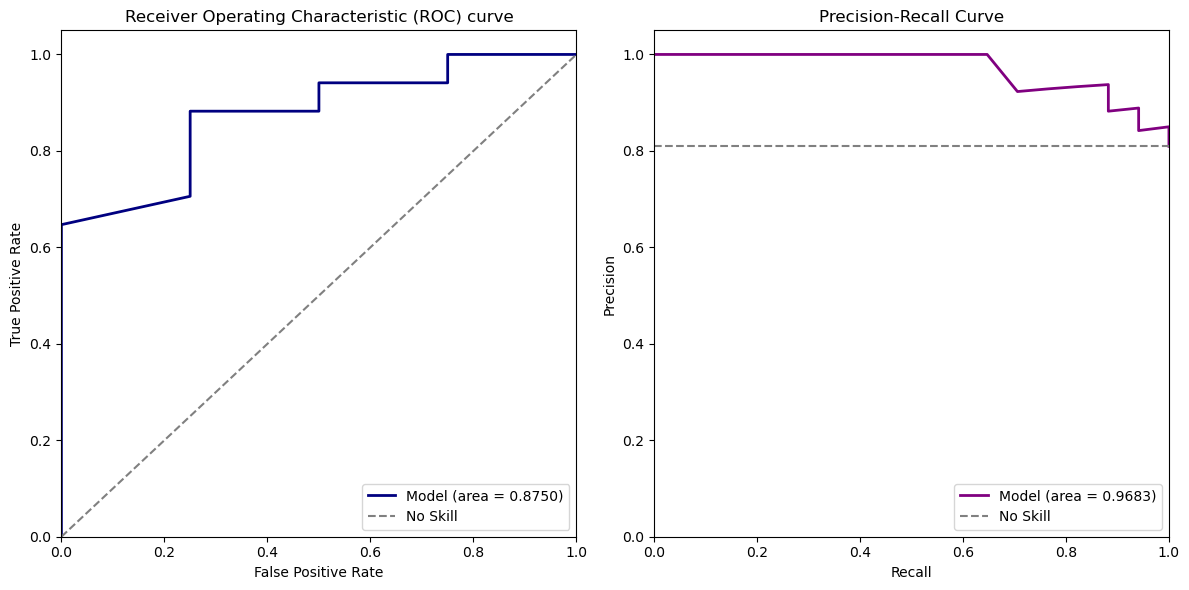

In [19]:
model_5_FLUOROURACIL.get_roc_pr_curves(best_parameters, False, 'tcga')

In [20]:
model_5_FLUOROURACIL.get_train_set_results(best_parameters, False)

Threshold used for cell-line with 5-FLUOROURACIL: 0.27997513353824616
Test set Idx 0 has only response [0]
Test set Idx 1 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,528,{0: 528},NaN,NaN
0,PDX,0,{},NaN,NaN
0,TCGA,104,"{1: 65, 0: 39}",0.670809,0.705285


Distribution of Predictions by Model
[2.75552480e-07 6.35949220e-07 7.39025722e-07 1.29289515e-06
 1.19358774e-05]
TP: 0, FP: 0, TN: 4, FN: 17


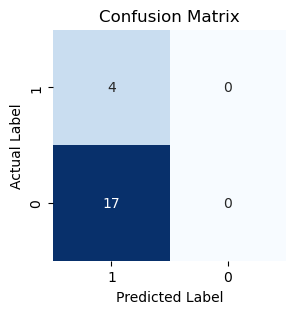

In [21]:
model_5_FLUOROURACIL.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## CYCLOPHOSPHAMIDE

In [22]:
best_parameters = {'audrc_threshold': 0.35980106830596925,
 'ldr': 0.15521831959486007,
 'lr': 0.39114894270896916,
 'weight_decay': 0.058388643264770515,
 'momentum': 0.5792483150959015,
 'step_size': 42,
 'loss_weight_epic': 3.187045991420746,
 'loss_weight_epif': 5.244421184062958,
 'loss_weight_epir': 1.547518938779831,
 'loops_agg_warm': 80,
 'loops_train': 250,
 'loops_warm': 70,
 'warm_up_agg': 0,
 'ite_train_epi_c': 200,
 'ite_train_epi_f': 90,
 'hd': 2,
 'batch_size': 32,
 'test_every': 1,
 'bn_eval': 0,
 'seed': 42}

In [23]:
model_CYCLOPHOSPHAMIDE = ModelEpiFCR('CYCLOPHOSPHAMIDE', 'cnv')
#  Unable to calculate AUROC for validation set 1
model_CYCLOPHOSPHAMIDE.get_results(best_parameters)

DomainSpecificNN(
  (feature1): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.15521831959486007, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (feature2): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=256, bias=True)
      (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.15521831959486007, inplace=False)
      (4): Linear(in_features=256, out_features=256, bias=True)
      (5): Sigmoid()
    )
  )
  (classifier1): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=256, out_features=1, bias=True)
    )
  )
  (classifier2): ClassifierModule(
    (pred): Sequential(
      (0): Linear(in_features=25

,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,66,"{0: 65, 1: 1}",0.123077,0.017241
0,TCGA,19,"{1: 17, 0: 2}",0.705882,0.965156


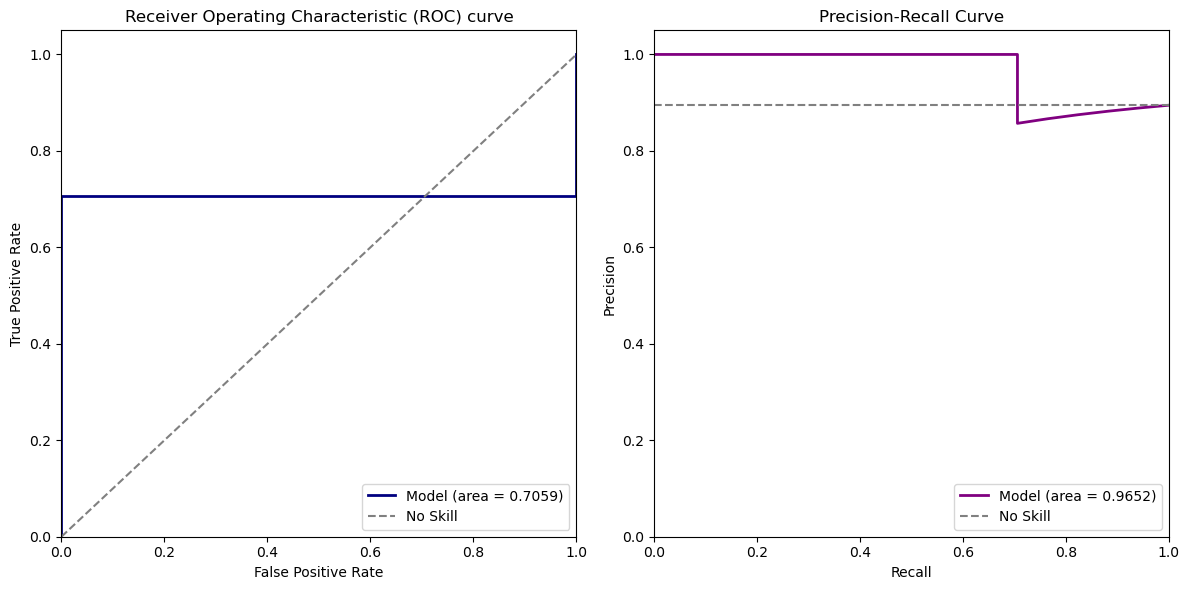

In [24]:
model_CYCLOPHOSPHAMIDE.get_roc_pr_curves(best_parameters, False, 'tcga')

In [25]:
model_CYCLOPHOSPHAMIDE.get_train_set_results(best_parameters, False)

Threshold used for cell-line with CYCLOPHOSPHAMIDE: 0.35980106830596925
Test set Idx 1 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,579,"{0: 567, 1: 12}",0.193710,0.040043
0,PDX,0,{},NaN,NaN
0,TCGA,50,"{1: 47, 0: 3}",0.602837,0.964768


Distribution of Predictions by Model
[0.00199742 0.00210601 0.00216363 0.00248588 0.00260539]
TP: 0, FP: 0, TN: 2, FN: 17


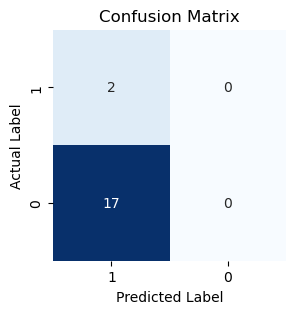

In [26]:
model_CYCLOPHOSPHAMIDE.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)

## GEMCITABINE

In [27]:
best_parameters = {'audrc_threshold': 0.37486990933306513,
 'ldr': 0.26333015870302917,
 'lr': 0.4756387839000672,
 'weight_decay': 0.03000725864432752,
 'momentum': 0.10452565387822688,
 'step_size': 85,
 'loss_weight_epic': 6.152408073656261,
 'loss_weight_epif': 0.6653343170881271,
 'loss_weight_epir': 2.52236514352262,
 'warm_up_agg': 0,
 'ite_train_epi_f': 50,
 'hd': 4,
 'batch_size': 32,
 'loops_agg_warm': 50,
 'loops_train': 400,
 'loops_warm': 50,
 'test_every': 1,
 'ite_train_epi_c': 50,
 'bn_eval': 0,
 'seed': 42}

In [28]:
model_GEMCITABINE = ModelEpiFCR('GEMCITABINE', 'cnv')
#  Unable to calculate AUROC for validation set 1
model_GEMCITABINE.get_results(best_parameters)

DomainSpecificNN(
  (feature1): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.26333015870302917, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU()
      (7): Dropout(p=0.26333015870302917, inplace=False)
      (8): Linear(in_features=64, out_features=64, bias=True)
      (9): Sigmoid()
    )
  )
  (feature2): FeatModule(
    (features): Sequential(
      (0): Linear(in_features=324, out_features=64, bias=True)
      (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Dropout(p=0.26333015870302917, inplace=False)
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): BatchNorm1d(64, eps=1e

/home/nicole/anaconda3/envs/druid/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:877: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,54,{0: 54},NaN,-0.000000
0,TCGA,18,"{0: 9, 1: 9}",0.62963,0.747884


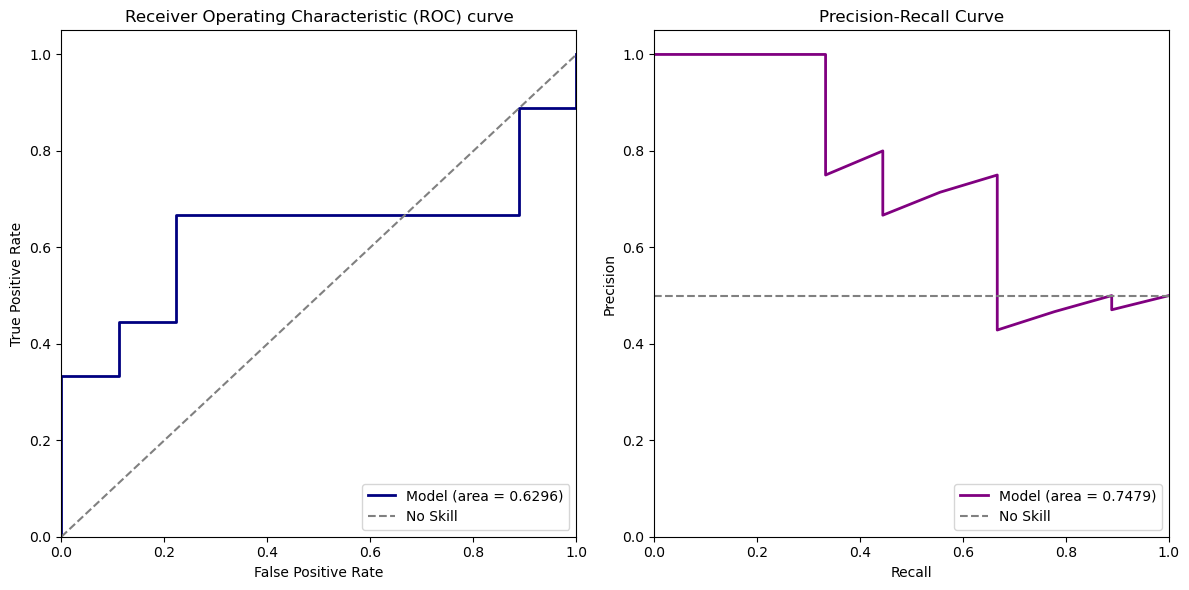

In [29]:
model_GEMCITABINE.get_roc_pr_curves(best_parameters, False, 'tcga')

In [30]:
model_GEMCITABINE.get_train_set_results(best_parameters, False)

Threshold used for cell-line with GEMCITABINE: 0.37486990933306513
Test set Idx 0 has only response [0]
Test set Idx 1 has only response []


,dataset,length_dataset,value_counts,roc_auc,aupr
0,cell-line,483,{0: 483},NaN,NaN
0,PDX,0,{},NaN,NaN
0,TCGA,44,"{1: 27, 0: 17}",0.813725,0.850272


Distribution of Predictions by Model
[0.15753068 0.1652353  0.16761651 0.17271504 0.18200663]
TP: 0, FP: 0, TN: 9, FN: 9


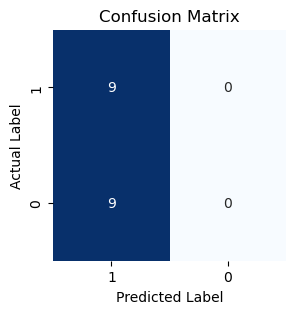

In [31]:
model_GEMCITABINE.plot_confusion_matrix(best_parameters, False, 'tcga', 0.5)